In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')

In [117]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')

In [118]:
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [119]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [121]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

<AxesSubplot:>

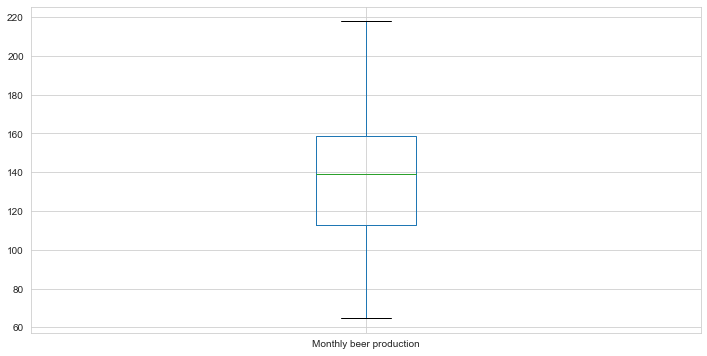

In [122]:
df['Monthly beer production'].plot(figsize=(12,6), kind='box')

In [123]:
df.set_index('Month')[:120]['Monthly beer production']

Month
1956-01     93.2
1956-02     96.0
1956-03     95.2
1956-04     77.1
1956-05     70.9
           ...  
1965-08    104.2
1965-09    106.4
1965-10    116.2
1965-11    135.9
1965-12    134.0
Name: Monthly beer production, Length: 120, dtype: float64

<AxesSubplot:xlabel='Month'>

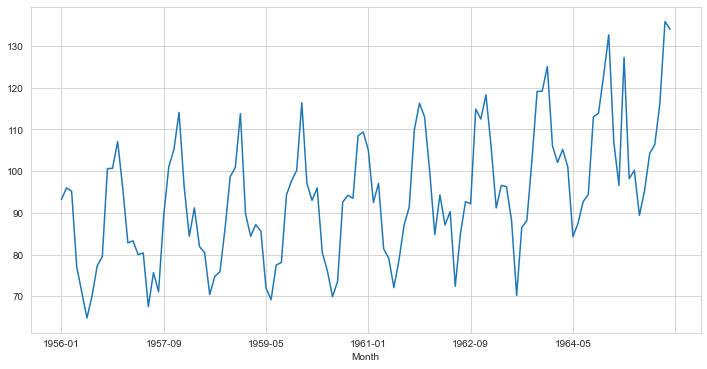

In [124]:
df.set_index('Month')[:120]['Monthly beer production'].plot(figsize=(12,6))

In [125]:
type(df['Month'][0])

str

In [126]:
df['Month'] = pd.to_datetime(df['Month'])

In [127]:
df['Month']

0     1956-01-01
1     1956-02-01
2     1956-03-01
3     1956-04-01
4     1956-05-01
         ...    
471   1995-04-01
472   1995-05-01
473   1995-06-01
474   1995-07-01
475   1995-08-01
Name: Month, Length: 476, dtype: datetime64[ns]

In [128]:
df = df.set_index('Month')

In [129]:
ts = df['Monthly beer production']

In [130]:
ts

Month
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
              ...  
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Name: Monthly beer production, Length: 476, dtype: float64

In [131]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    plt.figure(figsize=(12,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

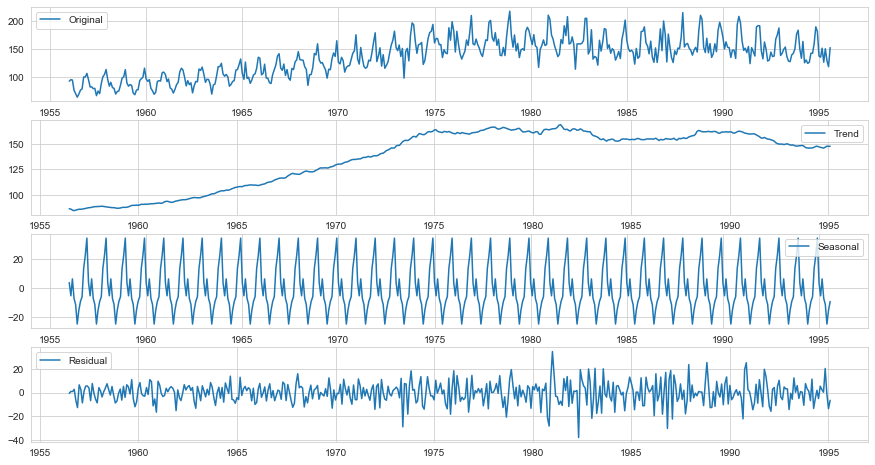

In [132]:
decomposition = seasonal_decompose(ts) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

axes = []
fig = plt.figure(figsize=(15,8))
    
axes.append( fig.add_subplot(4, 1, 1) )
plt.plot(ts, label='Original') 
plt.legend(loc='best') 
        
axes.append( fig.add_subplot(4, 1, 2) )
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 

axes.append( fig.add_subplot(4, 1, 3) )
plt.plot(seasonal, label='Seasonal') 
plt.legend(loc='best') 
    
axes.append( fig.add_subplot(4, 1, 4) )
plt.plot(residual, label='Residual') 
plt.legend(loc='best') 


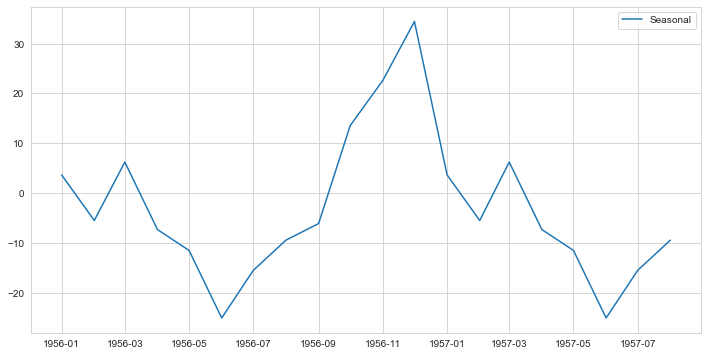

In [133]:
plt.figure(figsize=(12,6))
plt.plot(seasonal[:20], label='Seasonal') 
plt.legend(loc='best') 

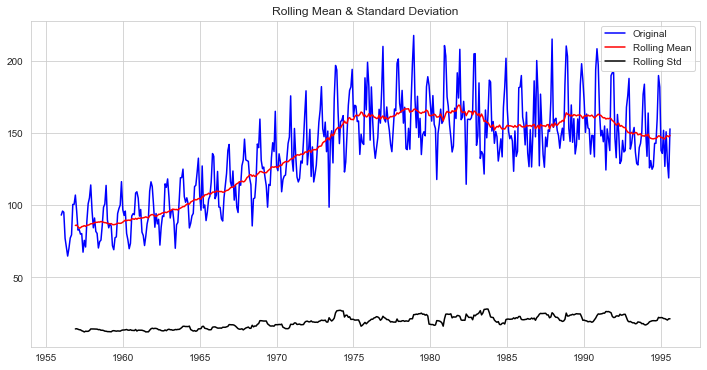

Results of Dickey-Fuller Test:
Test Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [134]:
test_stationarity(ts)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

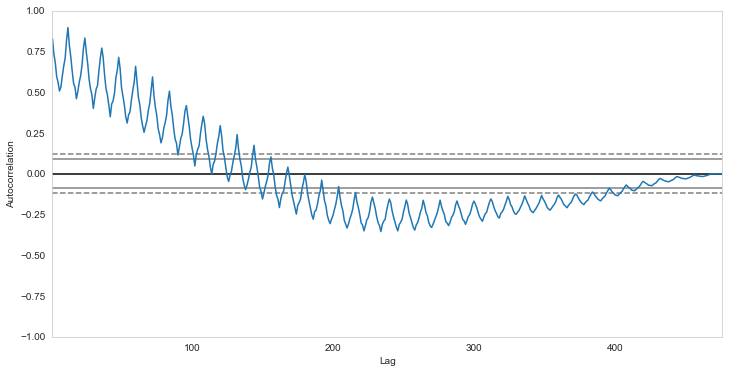

In [135]:
plt.figure(figsize=(12,6))
autocorrelation_plot(ts)

## Arima

In [136]:
size = int(len(ts.values) * 0.66)
train_data, test_data = ts[0:size], ts[size:len(ts)]

arima_model = ARIMA(ts, order=(6,0,8))
arima_model_prev = arima_model.fit()

c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\ddayv\appdata\local\programs\python\python37\li

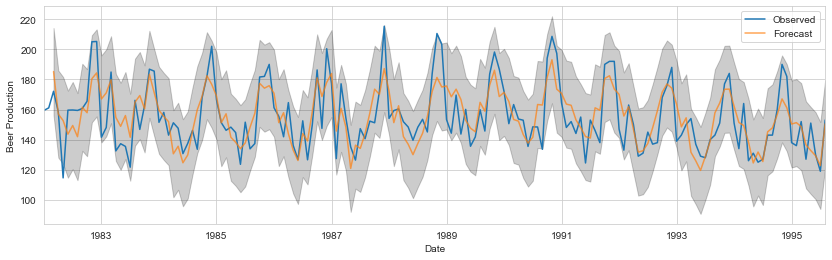

In [168]:
pred = arima_model_prev.get_prediction(start='1982-03-01', dynamic=False)
pred_ci = pred.conf_int()

ax = ts['1982':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Beer Production')

plt.legend()
plt.show()

In [169]:
mse = ((arima_pred - test_data) ** 2).mean()
print('ARIMA: ')
print(f'\nTest MSE {round(mse, 2)}')
print(f'\nTest RMSE {round(np.sqrt(mse), 2)}')
print(f'\nTest MAE {round(np.mean(abs(arima_pred - test_data)))}')

ARIMA: 

Test MSE 194.31

Test RMSE 13.94

Test MAE 11


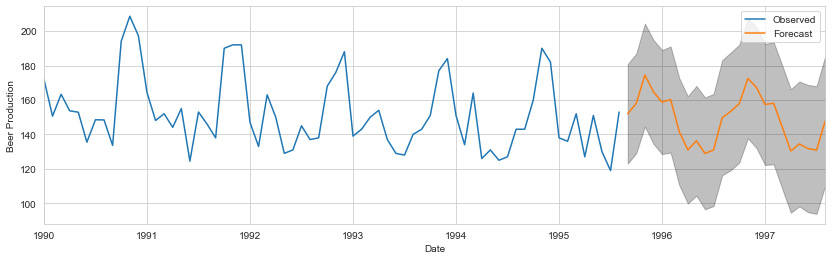

In [170]:
pred_uc = arima_model_prev.get_forecast(steps=24) # DOIS ANOS PARA FRENTE
pred_ci = pred_uc.conf_int()

ax = ts['1990':].plot(label='Observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Beer Production')

plt.legend()
plt.show()

## Sarima

In [141]:
mod = sm.tsa.statespace.SARIMAX(ts, order=(0, 0, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0268      0.044      0.602      0.547      -0.060       0.114
ar.S.L12       0.0017      0.121      0.014      0.989      -0.235       0.238
ma.S.L12      -0.3211      0.128     -2.518      0.012      -0.571      -0.071
sigma2       146.8185      8.514     17.245      0.000     130.132     163.506


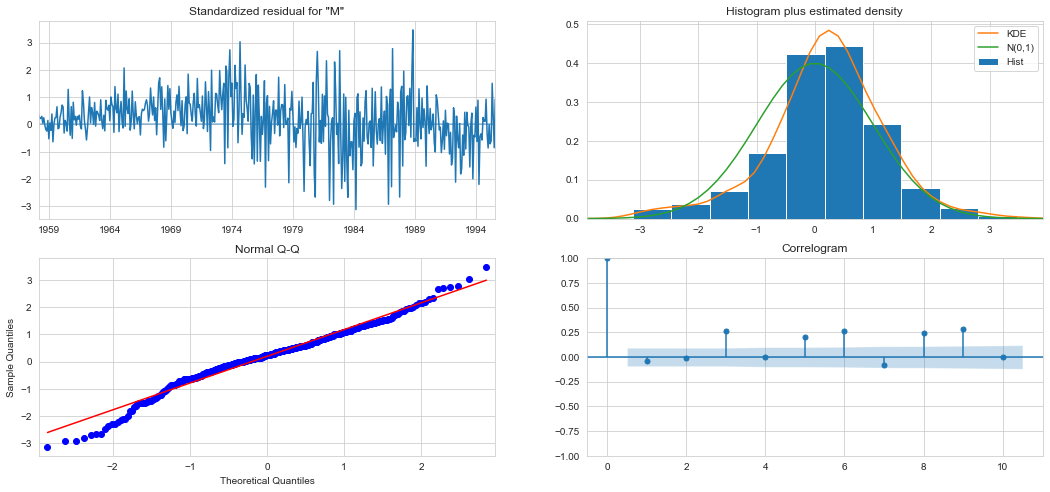

In [142]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

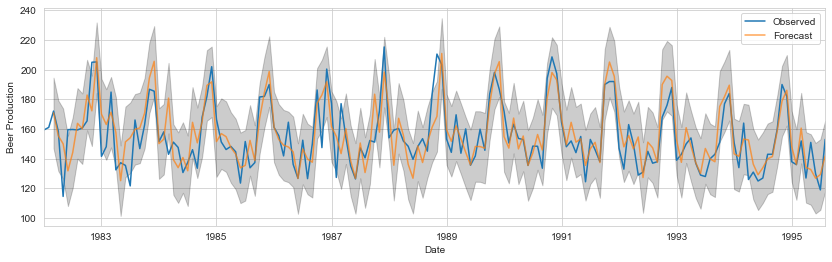

In [171]:
pred_ = results.get_prediction(start='1982-03-01', dynamic=False)
pred_ci_ = pred_.conf_int()

ax = ts['1982':].plot(label='Observed')
pred_.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))

ax.fill_between(pred_ci_.index, pred_ci_.iloc[:, 0], pred_ci_.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Beer Production')

plt.legend()
plt.show()

In [174]:
y_forecasted = pred_.predicted_mean
y_truth = ts['1982-03-01':]
mse2 = ((y_forecasted - y_truth) ** 2).mean()
print('SARIMA: ')
print(f'\nTest MSE {round(mse2, 2)}')
print(f'\nTest RMSE {round(np.sqrt(mse2), 2)}')
print(f'\nTest MAE {round(np.mean(abs(y_forecasted - y_truth)))}')

SARIMA: 

Test MSE 185.29

Test RMSE 13.61

Test MAE 10


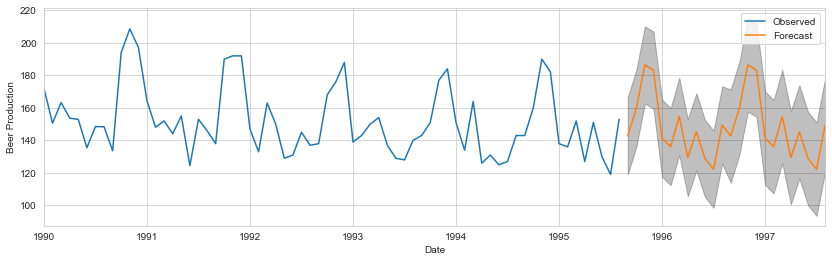

In [175]:
pred_uc = results.get_forecast(steps=24) # DOIS ANOS PARA FRENTE
pred_ci = pred_uc.conf_int()

ax = ts['1990':].plot(label='Observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Beer Production')

plt.legend()
plt.show()

## Rede Neural / Regressão

In [176]:
def series_to_supervised(serie, steps_in):
    features = pd.DataFrame() # dataframe para retorno
    features['t'] = serie # valores em t
    for i in range(1, steps_in+1): # valores em t-1, t-2, .. t-steps_in
        features['t-'+str(i)] = serie.shift(i)
    features = features.iloc[steps_in:] # remove linhas iniciais com nan
    return features

In [177]:
steps_in = 2
data_features = series_to_supervised(ts, steps_in)
data_features

,t,t-1,t-2
Month,,,
1956-03-01,95.2,96.0,93.2
1956-04-01,77.1,95.2,96.0
1956-05-01,70.9,77.1,95.2
1956-06-01,64.8,70.9,77.1
1956-07-01,70.1,64.8,70.9
...,...,...,...
1995-04-01,127.0,152.0,136.0
1995-05-01,151.0,127.0,152.0
1995-06-01,130.0,151.0,127.0


In [178]:
train_, test_ = data_features[0:size], data_features[size:len(ts.values)]

In [179]:
y_train_regre, y_test_regre = train_['t'], test_['t']

train_, test_ = train_.drop(columns=['t']), test_.drop(columns=['t'])

## Regressão

In [180]:
model = LinearRegression()

model.fit(train_,y_train_regre)

LinearRegression()

In [181]:
test_

,t-1,t-2
Month,,
1982-05-01,158.4,172.1
1982-06-01,114.6,158.4
1982-07-01,159.6,114.6
1982-08-01,159.7,159.6
1982-09-01,159.4,159.7
...,...,...
1995-04-01,152.0,136.0
1995-05-01,127.0,152.0
1995-06-01,151.0,127.0


In [182]:
y_pred_regre = model.predict(test_)

In [183]:
print('Regressão: ')
print(f'\nTest MSE: {mean_squared_error(y_test_regre,y_pred_regre):.3f}')
print(f'\nTest RMSE: {np.sqrt(mean_squared_error(y_test_regre,y_pred_regre)):.3f}')
print(f'\nTest MAE: {np.mean(abs(y_test_regre-y_pred_regre)):.3f}')

Regressão: 

Test MSE: 497.125

Test RMSE: 22.296

Test MAE: 17.455


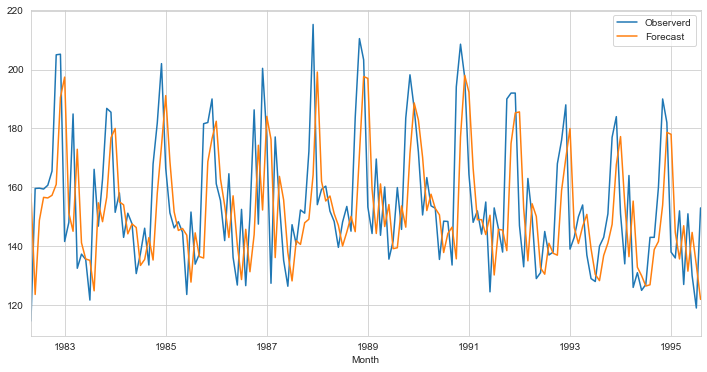

In [184]:
plt.figure(figsize=(12,6))

ts['1982-05-01':].plot(label='Observerd')
pd.Series(y_pred_regre , index=ts['1982-05-01':].index).plot(label='Forecast')

plt.legend(loc='best')
plt.show()

In [185]:
X_train = train_.values
X_test = test_.values

In [186]:
X_train = X_train.reshape(X_train.shape[0],1,2)
X_test = X_test.reshape(X_test.shape[0],1,2)

## Rede Neural

In [187]:
model_NN = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    
])

model_NN.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [188]:
y_train = y_train_regre.values.reshape(-1,1)
y_test = y_test_regre.values.reshape(-1,1)

In [189]:
history = model_NN.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 16113.1992 - mae: 122.4096 - val_loss: 21753.1523 - val_mae: 145.8608
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 14912.7930 - mae: 117.7273 - val_loss: 20207.3320 - val_mae: 140.5132
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 13781.8486 - mae: 113.1009 - val_loss: 18455.6836 - val_mae: 134.1374
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 12445.7998 - mae: 107.4047 - val_loss: 16550.4629 - val_mae: 126.8981
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 11101.6748 - mae: 101.3120 - val_loss: 14536.4746 - val_mae: 118.7161
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 9041.7510 - mae: 90.9990 - val_loss: 9948.1523 - val_mae: 97.1577
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 5190.3672 - mae: 67.5087 - val_loss: 4265.2334 - val_mae: 61.9408
Epoch 8/50
10

In [190]:
y_pred_nn = model_NN.predict(X_test)

In [191]:
y_pred_NN = []

for i in range(len(y_pred_nn)):
    y_pred_NN.append(y_pred_nn[i][0])

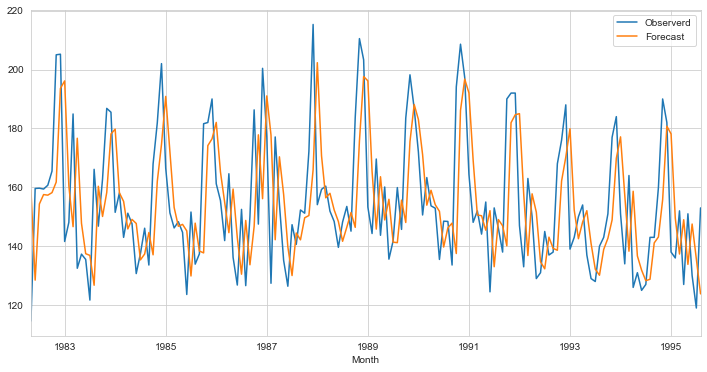

In [192]:
plt.figure(figsize=(12,6))

ts['1982-05-01':].plot(label='Observerd')
pd.Series(y_pred_NN , index=ts['1982-05-01':].index).plot(label='Forecast')

plt.legend(loc='best')
plt.show()

In [193]:
print('NN: ')
print(f'\nTest MSE: {mean_squared_error(y_test_regre,y_pred_NN):.3f}')
print(f'\nTest RMSE: {np.sqrt(mean_squared_error(y_test_regre,y_pred_NN)):.3f}')
print(f'\nTest MAE: {np.mean(abs(y_test_regre-y_pred_NN)):.3f}')

NN: 

Test MSE: 482.388

Test RMSE: 21.963

Test MAE: 17.477


## Comparação

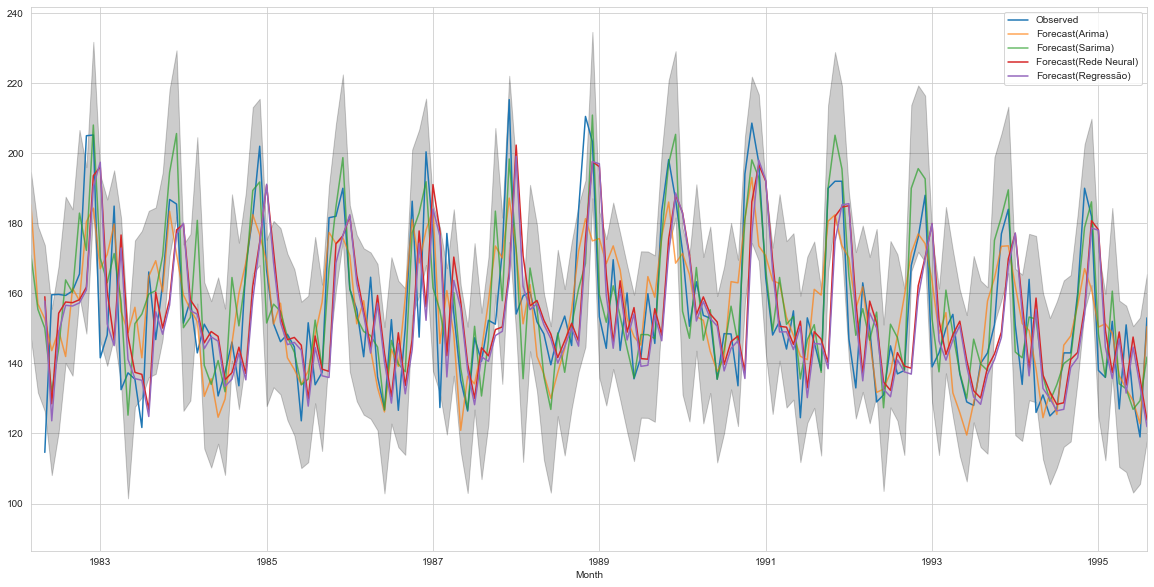

In [194]:
ax = ts['1982-05-01':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast(Arima)', alpha=.7,figsize=(20, 10))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

pred_.predicted_mean.plot(ax=ax, label='Forecast(Sarima)', alpha=.7)
ax.fill_between(pred_ci_.index, pred_ci_.iloc[:, 0], pred_ci_.iloc[:, 1], color='k', alpha=.2)

pd.Series(y_pred_NN , index=ts['1982-05-01':].index).plot(label='Forecast(Rede Neural)')
pd.Series(y_pred_regre , index=ts['1982-05-01':].index).plot(label='Forecast(Regressão)')

plt.legend(loc='best')

In [195]:
print('ARIMA: ')
print(f'\nTest MSE {round(mse, 2)}')
print(f'\nTest RMSE {round(np.sqrt(mse), 2)}')
print(f'\nTest MAE {round(np.mean(abs(arima_pred - test_data)))}')

print('\nSARIMA: ')
print(f'\nTest MSE {round(mse2, 2)}')
print(f'\nTest RMSE {round(np.sqrt(mse2), 2)}')
print(f'\nTest MAE {round(np.mean(abs(y_forecasted - y_truth)))}')

print('\nRegressão: ')
print(f'\nTest MSE: {mean_squared_error(y_test_regre,y_pred_regre):.3f}')
print(f'\nTest RMSE: {np.sqrt(mean_squared_error(y_test_regre,y_pred_regre)):.3f}')
print(f'\nTest MAE: {np.mean(abs(y_test_regre-y_pred_regre)):.3f}')

print('\nNN: ')
print(f'\nTest MSE: {mean_squared_error(y_test_regre,y_pred_NN):.3f}')
print(f'\nTest RMSE: {np.sqrt(mean_squared_error(y_test_regre,y_pred_NN)):.3f}')
print(f'\nTest MAE: {np.mean(abs(y_test_regre-y_pred_NN)):.3f}')

ARIMA: 

Test MSE 194.31

Test RMSE 13.94

Test MAE 11

SARIMA: 

Test MSE 185.29

Test RMSE 13.61

Test MAE 10

Regressão: 

Test MSE: 497.125

Test RMSE: 22.296

Test MAE: 17.455

NN: 

Test MSE: 482.388

Test RMSE: 21.963

Test MAE: 17.477
